<a href="https://colab.research.google.com/github/Pham-Hung-tns/Marketing_Campaign_Analysis/blob/main/Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# import data

df = pd.read_csv("/content/marketing.csv");
df.head(5)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


## Column: date_served

In [ ]:
# current format is mm/dd/yy
df['date_served'].tail(5)

,date_served
10032,1/17/18
10033,1/17/18
10034,1/5/18
10035,1/17/18
10036,1/6/18


In [ ]:
# change this column's format to yyyy/mm/dd

df["date_served"] = pd.to_datetime(df["date_served"])
df["date_served"].tail(5)

/tmp/ipython-input-5-3888630459.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_served"] = pd.to_datetime(df["date_served"])


,date_served
10032,2018-01-17
10033,2018-01-17
10034,2018-01-05
10035,2018-01-17
10036,2018-01-06


## Colum: Age groups

In [ ]:
df['age_group'].value_counts()

,count
age_group,
19-24 years,1682
24-30 years,1568
0-18 years,1539
30-36 years,1355
36-45 years,1353
45-55 years,1353
55+ years,1187


In [ ]:
df['age_group']=df['age_group'].str.replace(' years','')

In [ ]:
df['age_group']

,age_group
0,0-18
1,19-24
2,24-30
3,30-36
4,36-45
...,...
10032,45-55
10033,55+
10034,55+
10035,0-18


## Column: date_subcribed and date_canceled


In [ ]:
df['date_subscribed']=pd.to_datetime(df['date_subscribed'])
df['date_canceled']=pd.to_datetime(df['date_canceled'])

/tmp/ipython-input-9-2521716493.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_subscribed']=pd.to_datetime(df['date_subscribed'])
/tmp/ipython-input-9-2521716493.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_canceled']=pd.to_datetime(df['date_canceled'])


In [ ]:
#creating day of week for subscription for future analysis

df['day_of_week_subscribed']=df['date_subscribed'].dt.day_name()

In [ ]:
df['day_of_week_subscribed'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', nan], dtype=object)

## Column: Marketing Channel

In [ ]:
df['marketing_channel'].value_counts()

,count
marketing_channel,
House Ads,4733
Instagram,1871
Facebook,1860
Push,993
Email,565


## Column: Variant

In [ ]:
df['variant'].value_counts()

,count
variant,
control,5091
personalization,4946


#Exploratory Data

In [ ]:
df.head(5)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,day_of_week_subscribed
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18,2018-01-01,NaT,House Ads,True,Monday
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24,2018-01-01,NaT,House Ads,True,Monday
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30,2018-01-01,NaT,House Ads,True,Monday
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36,2018-01-01,NaT,House Ads,True,Monday
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45,2018-01-01,NaT,House Ads,True,Monday


In [ ]:
df['subscribing_channel'].unique()

array(['House Ads', 'Email', 'Push', 'Facebook', 'Instagram', nan],
      dtype=object)

In [ ]:
print("Total users: {0}".format(df['user_id'].nunique()))

Total users: 7309


In [ ]:
print("Total users convert sucessfully: {0}".format(df.loc[df['converted'] == True,'user_id'].nunique()))

Total users convert sucessfully: 1015


## Marketing channel analysis

In [ ]:
# Ads count by each channel
channel_count = df['marketing_channel'].value_counts(sort = True, ascending= False)
channel_count

,count
marketing_channel,
House Ads,4733
Instagram,1871
Facebook,1860
Push,993
Email,565


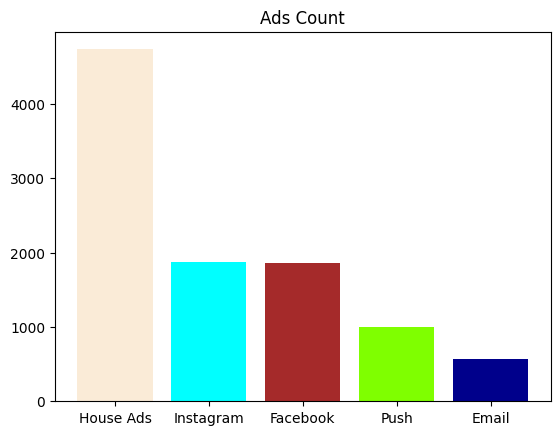

In [ ]:
plt.bar(channel_count.keys().tolist(), channel_count.values, color=['#FAEBD7','#00FFFF','#A52A2A','#7FFF00','#00008B'])
plt.title("Ads Count",fontsize=12);
plt.show()

In [ ]:
#pivoting the ads count by channel - Ads count by each channel by day

daily_ads_count=df.pivot_table(values="user_id",index="date_served", columns="marketing_channel", aggfunc=len)
daily_ads_count.head(10)

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1,69,191,78,36
2018-01-02,4,64,250,63,36
2018-01-03,2,63,220,66,37
2018-01-04,2,66,168,64,36
2018-01-05,1,64,160,70,36
2018-01-06,5,64,152,65,29
2018-01-07,3,52,132,60,34
2018-01-08,1,67,154,65,32
2018-01-09,2,59,157,60,37


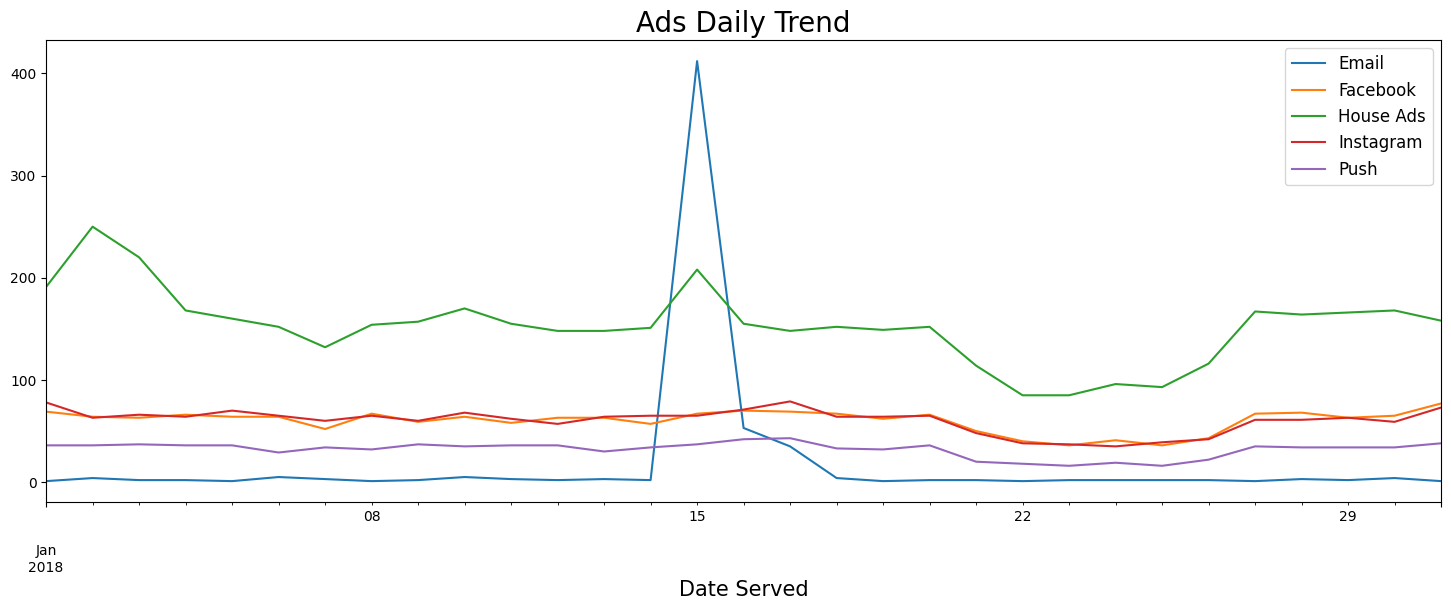

In [ ]:
daily_ads_count.plot(kind='line',figsize=(18,6))
plt.xlabel("Date Served",size=15);
plt.title("Ads Daily Trend",size=20)
plt.legend(loc='upper right',fontsize=12);

In [ ]:
conversions=df.groupby('marketing_channel')['converted'].sum()
ads=df.groupby('marketing_channel')['converted'].count()
conversion_df=pd.concat([conversions,ads],axis=1)
conversion_df

,converted,converted
marketing_channel,,
Email,193,565
Facebook,237,1860
House Ads,298,4733
Instagram,265,1871
Push,83,993


In [ ]:
# change name columns
conversion_df.columns=['conversions','ads_served']

In [ ]:
# conversion_rate
conversion_df['conversio_rate'] = round(conversion_df['conversions'] / conversion_df['ads_served'],2)

In [ ]:
conversion_df

,conversions,ads_served,conversio_rate
marketing_channel,,,
Email,193,565,0.341593
Facebook,237,1860,0.127419
House Ads,298,4733,0.062962
Instagram,265,1871,0.141635
Push,83,993,0.083585




*   Email có tỷ lệ chuyển đổi cao nhất
*   House Ads có số quảng cáo cao nhất nhưng tỷ lệ chuyển đổi lại thấp nhất -> Vấn đề



## Control & Experimemt Groups

In [ ]:
ads_served = df.groupby(['variant','marketing_channel'])['converted'].count()
converted = df.groupby(['variant','marketing_channel'])['converted'].sum()

convrsion_df = pd.concat([ads_served,converted],axis=1)
convrsion_df.columns = ['ads_served','conversions']
convrsion_df['conversion_rate'] = round(convrsion_df['conversions'] / convrsion_df['ads_served'],2)

convrsion_df

ads_served conversions conversion_rate
variant         marketing_channel                                        
control         Email                     274          80        0.291971
                Facebook                  894          52        0.058166
                House Ads                2552         172        0.067398
                Instagram                 888          52        0.058559
                Push                      468          15        0.032051
personalization Email                     291         113        0.388316
                Facebook                  966         185        0.191511
                House Ads                2181         126        0.057772
                Instagram                 983         213        0.216684
                Push                      525          68        0.129524

In [ ]:
ads_served_by_variant = df.groupby('variant')['converted'].count().reset_index()
print("Total ads served by variant: ", ads_served_by_variant)



conversions_served_by_variant = df.groupby('variant')['converted'].sum().reset_index()
print("Total conversions by variant: ", conversions_served_by_variant)


Total ads served by variant:             variant  converted
0          control       5076
1  personalization       4946
Total conversions by variant:             variant converted
0          control       371
1  personalization       705


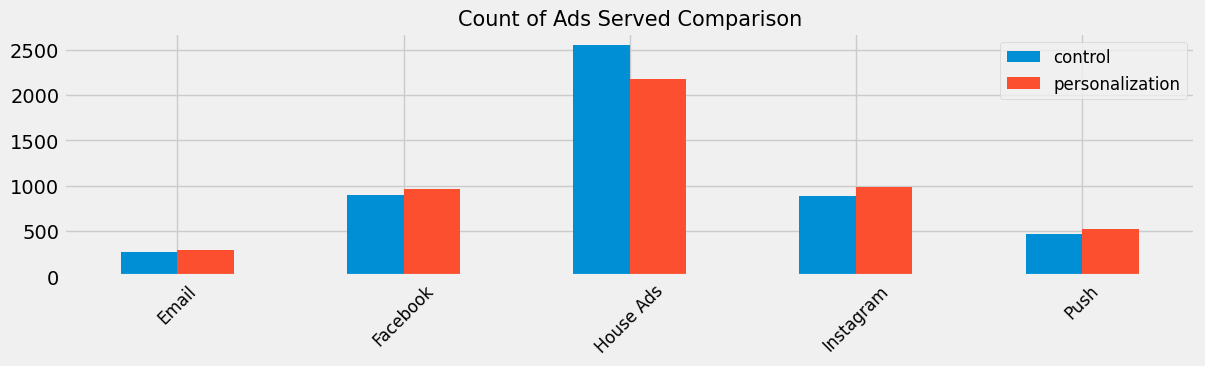

In [ ]:
plt.style.use('fivethirtyeight')

convrsion_df.unstack(level=0).plot(kind='bar',y='ads_served',figsize=(13,3))

plt.title("Count of Ads Served Comparison",size=15)
plt.xlabel("")
plt.xticks(rotation=45, size=12)
plt.legend(loc='upper right',fontsize=12);

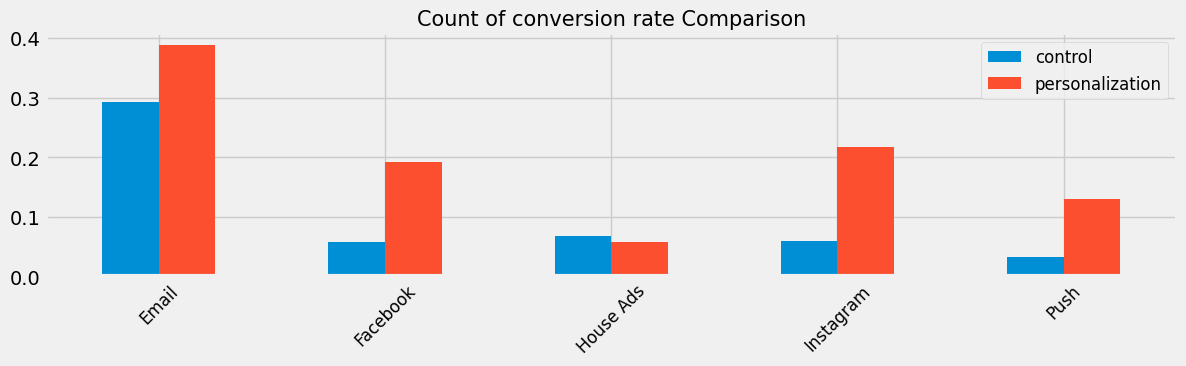

In [ ]:
plt.style.use('fivethirtyeight')

convrsion_df.unstack(level=0).plot(kind='bar',y='conversion_rate',figsize=(13,3))

plt.title("Count of conversion rate Comparison",size=15)
plt.xlabel("")
plt.xticks(rotation=45, size=12)
plt.legend(loc='upper right',fontsize=12);

## Retention rate



In [ ]:
# convert successfully
convert_df = df[df['converted'] == 1]
convert_df.head(5)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,day_of_week_subscribed
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18,2018-01-01,NaT,House Ads,True,Monday
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24,2018-01-01,NaT,House Ads,True,Monday
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30,2018-01-01,NaT,House Ads,True,Monday
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36,2018-01-01,NaT,House Ads,True,Monday
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45,2018-01-01,NaT,House Ads,True,Monday


In [ ]:
total_subs = convert_df['user_id'].nunique()

retain_subs = convert_df.loc[convert_df['is_retained'] == 1]['user_id'].nunique()

retain_rate = round(retain_subs / total_subs,1) * 100

retain_rate

60.0

## Conversions Analysis by Age Group

In [ ]:
age_df=df.pivot_table(values='user_id',index=['marketing_channel'],columns='age_group',aggfunc=len)
age_df

age_group,0-18,19-24,24-30,30-36,36-45,45-55,55+
marketing_channel,,,,,,,
Email,93,111,120,60,63,65,53
Facebook,264,347,296,249,226,299,179
House Ads,694,761,681,699,589,678,631
Instagram,300,315,286,259,280,227,204
Push,186,145,183,86,193,82,118


In [ ]:
def conversion_rate(df, column_names):
    # Total number of converted users
    column_conv = df[df['converted'] == 1].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = df.groupby(column_names)['user_id'].nunique()

    # Conversion rate
    conversion_rate = round(column_conv/column_total,2)

    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [ ]:
age_group_conrate = conversion_rate(df,["marketing_channel","age_group"])
age_group_conv_df=pd.DataFrame(age_group_conrate.unstack(level=0))
age_group_conv_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18,0.41,0.17,0.10,0.13,0.08
19-24,0.46,0.23,0.09,0.31,0.17
24-30,0.45,0.17,0.10,0.19,0.11
30-36,0.22,0.07,0.05,0.05,0.05
36-45,0.19,0.06,0.06,0.06,0.02
45-55,0.22,0.03,0.05,0.07,0.06
55+,0.19,0.09,0.06,0.07,0.05


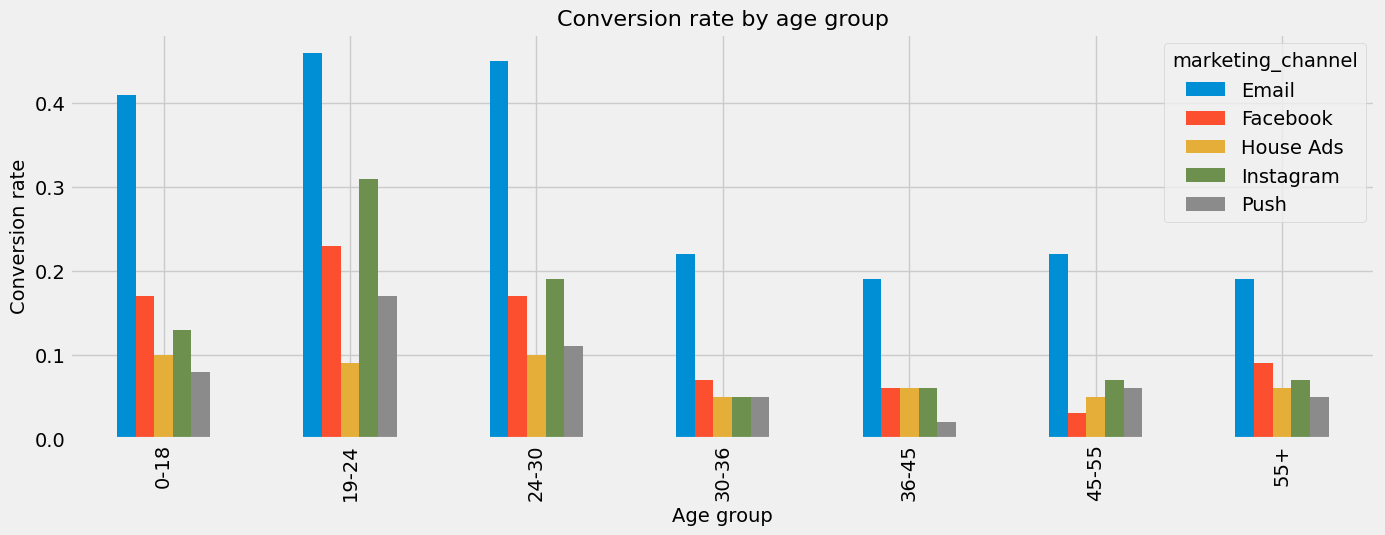

In [ ]:
plt.style.use('fivethirtyeight')
age_group_conv_df.plot(kind='bar',figsize=(15,5))


plt.title('Conversion rate by age group', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14);

## Plotting Conversion rates by Channel and Date

In [ ]:
def plotting_conv(df,kind):
    for column in df.columns:
        plt.style.use('ggplot')
        df[column].plot(kind=kind,figsize=(20,5))

        plt.title(column + ' conversion rate', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.grid(False)
        plt.show()
        plt.clf();

In [ ]:
channel_convr_df=pd.DataFrame(conversion_rate(df,['date_served','marketing_channel']).unstack(level=1))
channel_convr_df.head(10)

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1.0,0.12,0.08,0.11,0.08
2018-01-02,1.0,0.10,0.08,0.13,0.06
2018-01-03,0.0,0.08,0.09,0.17,0.08
2018-01-04,0.5,0.14,0.09,0.13,0.06
2018-01-05,1.0,0.11,0.13,0.16,0.03
2018-01-06,0.6,0.11,0.11,0.10,0.07
2018-01-07,1.0,0.10,0.15,0.18,0.09
2018-01-08,1.0,0.14,0.10,0.12,0.06
2018-01-09,0.5,0.12,0.13,0.15,0.05


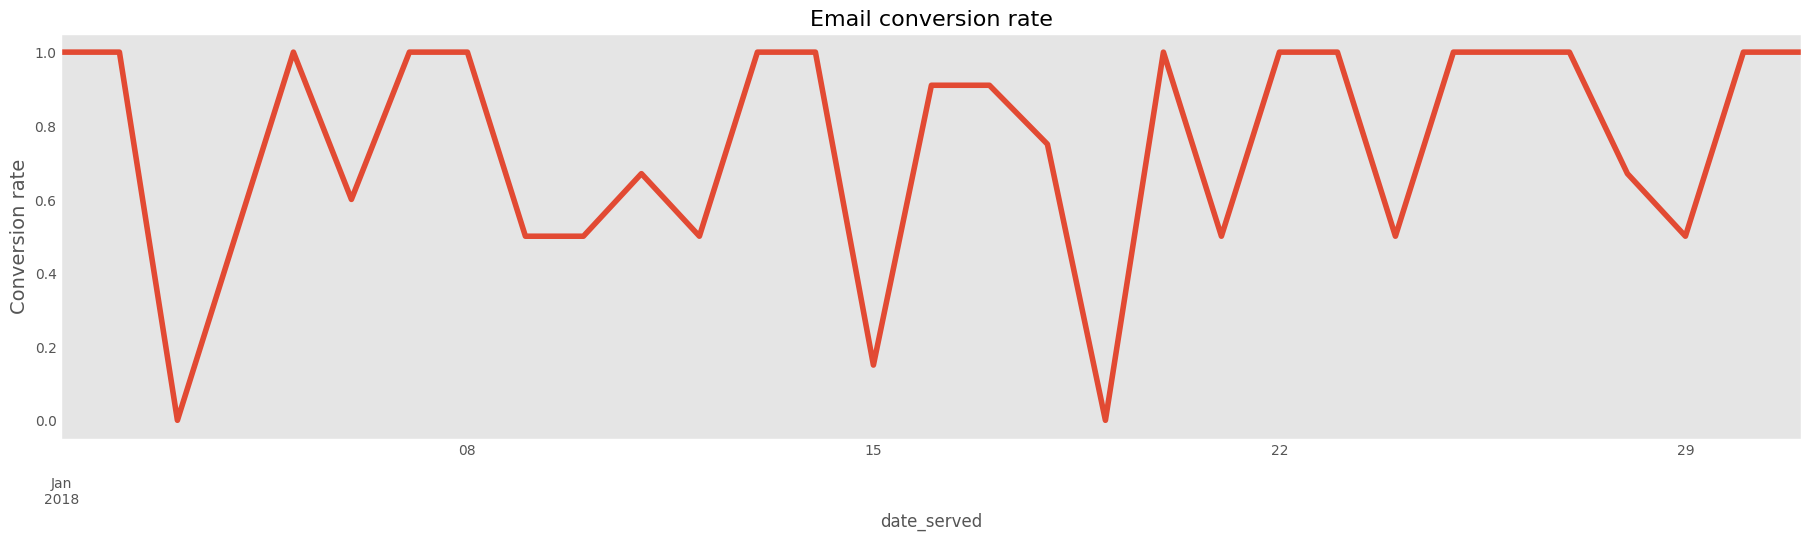

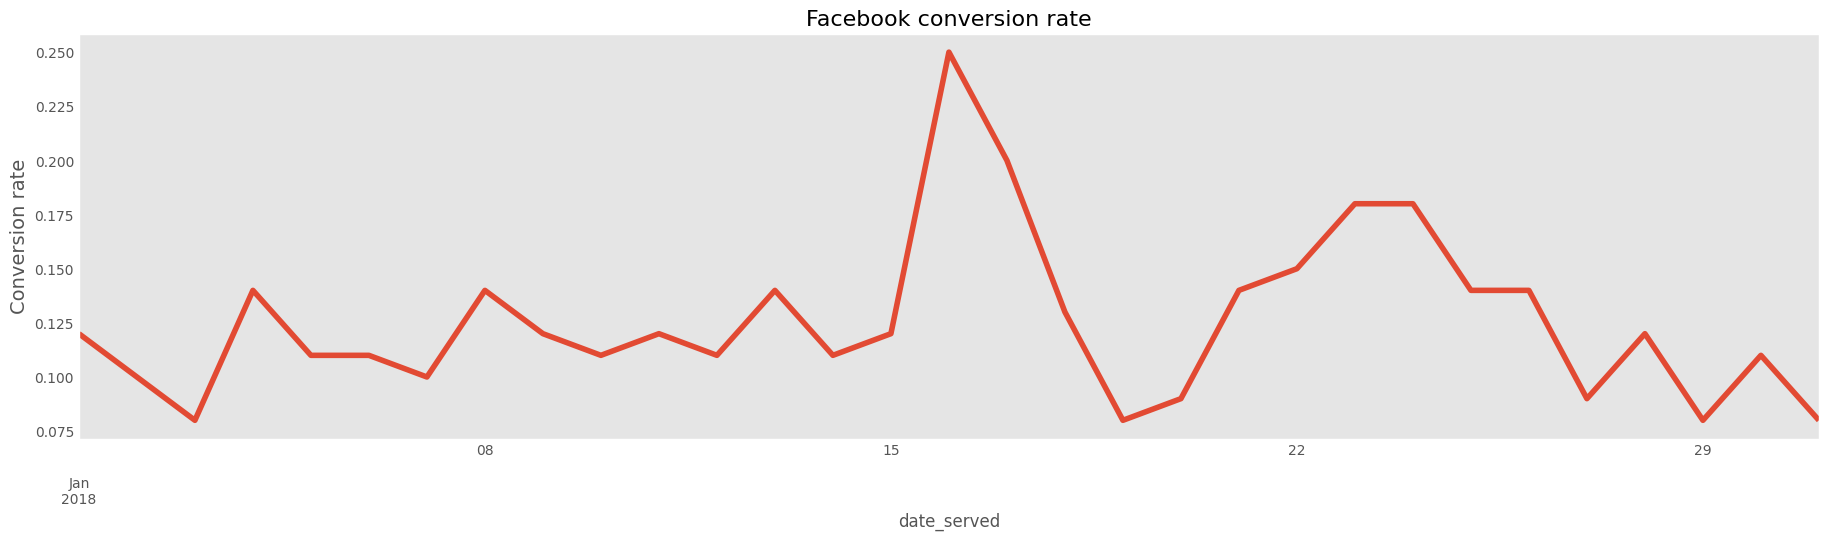

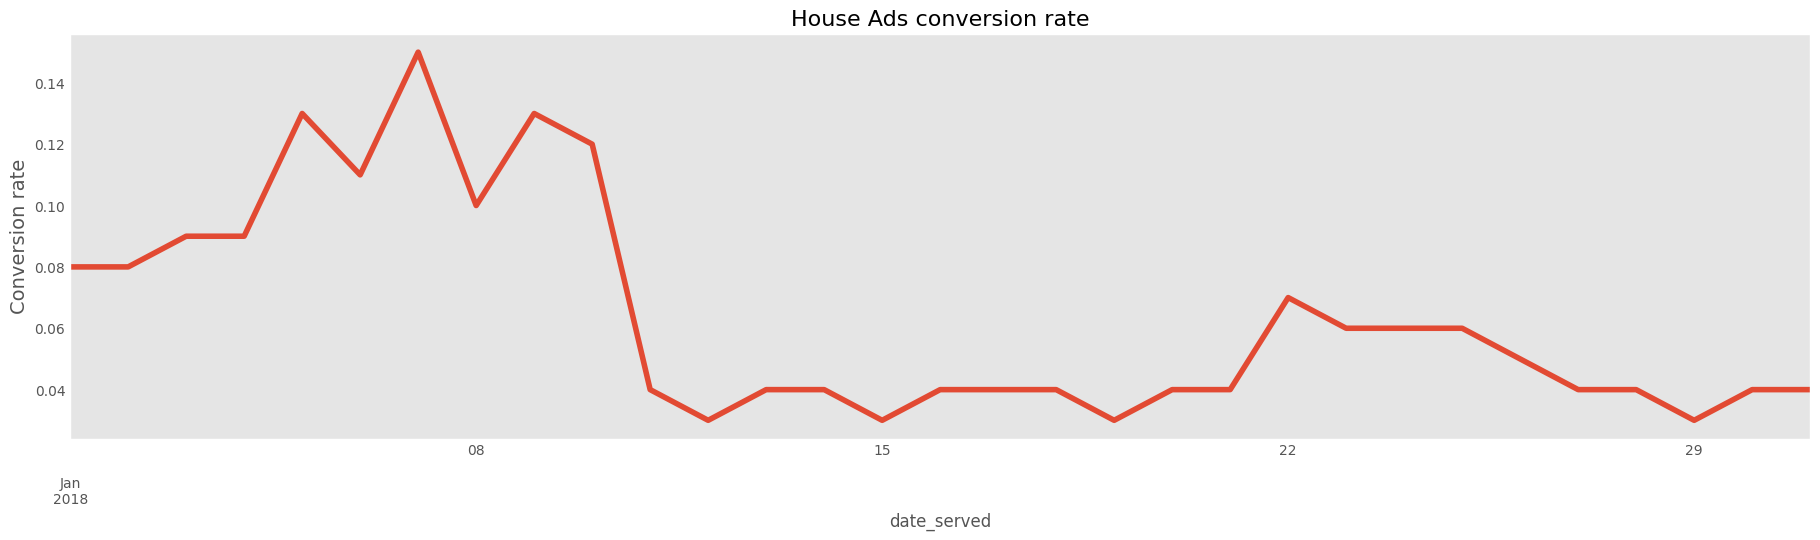

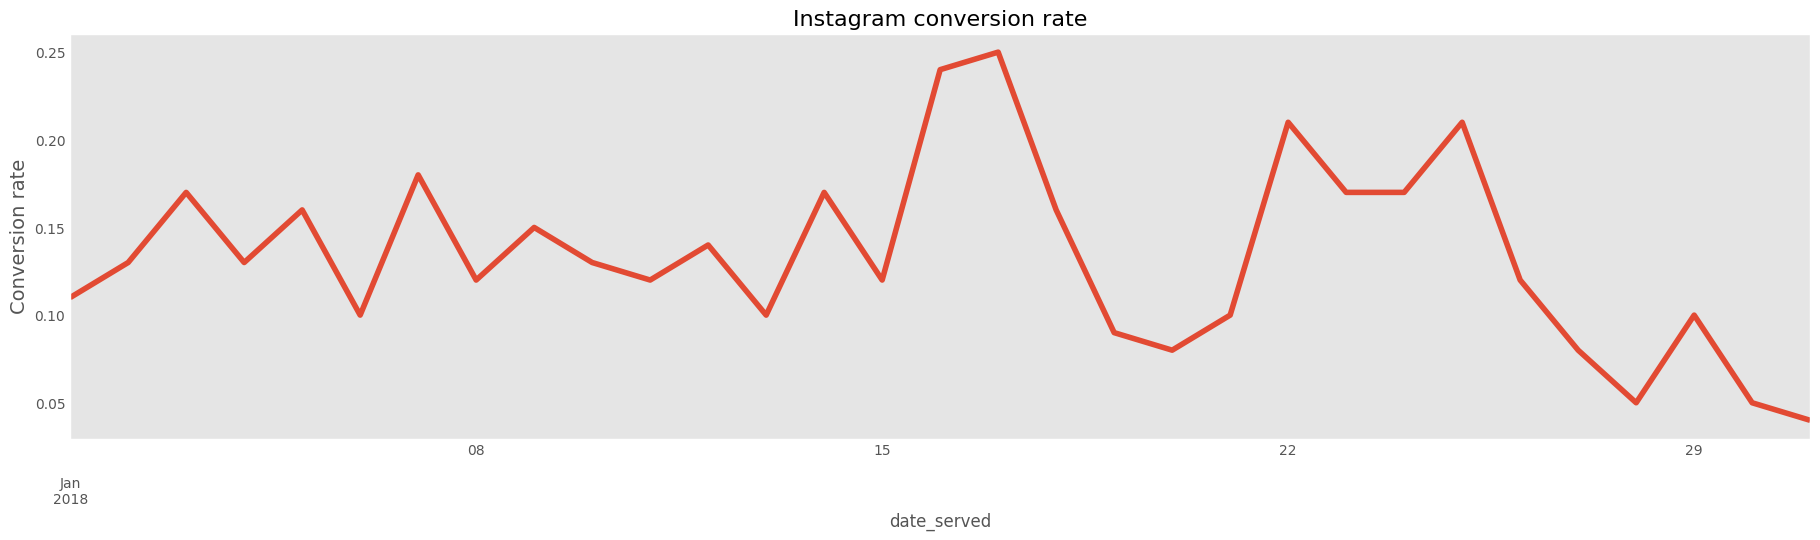

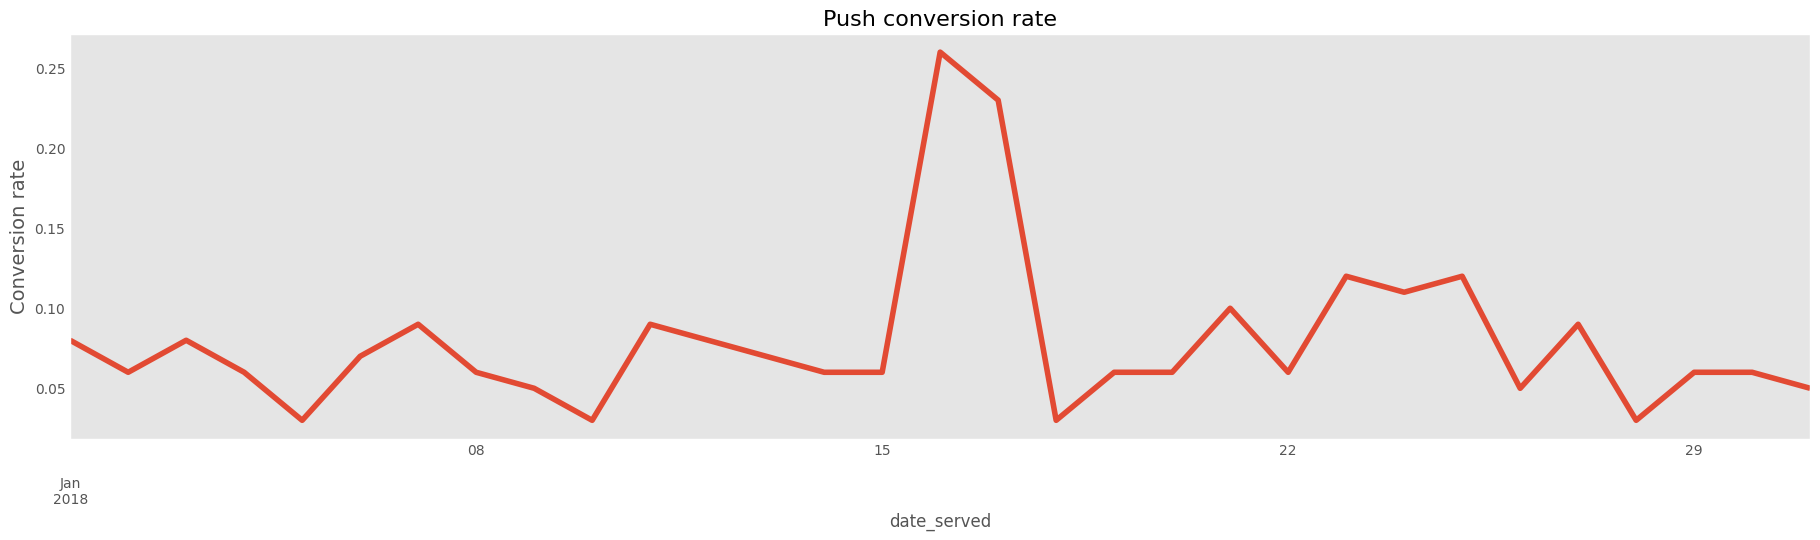

<Figure size 640x480 with 0 Axes>

In [ ]:
plotting_conv(channel_convr_df,"line");

## Ploting Conversions Rate by Age and Date

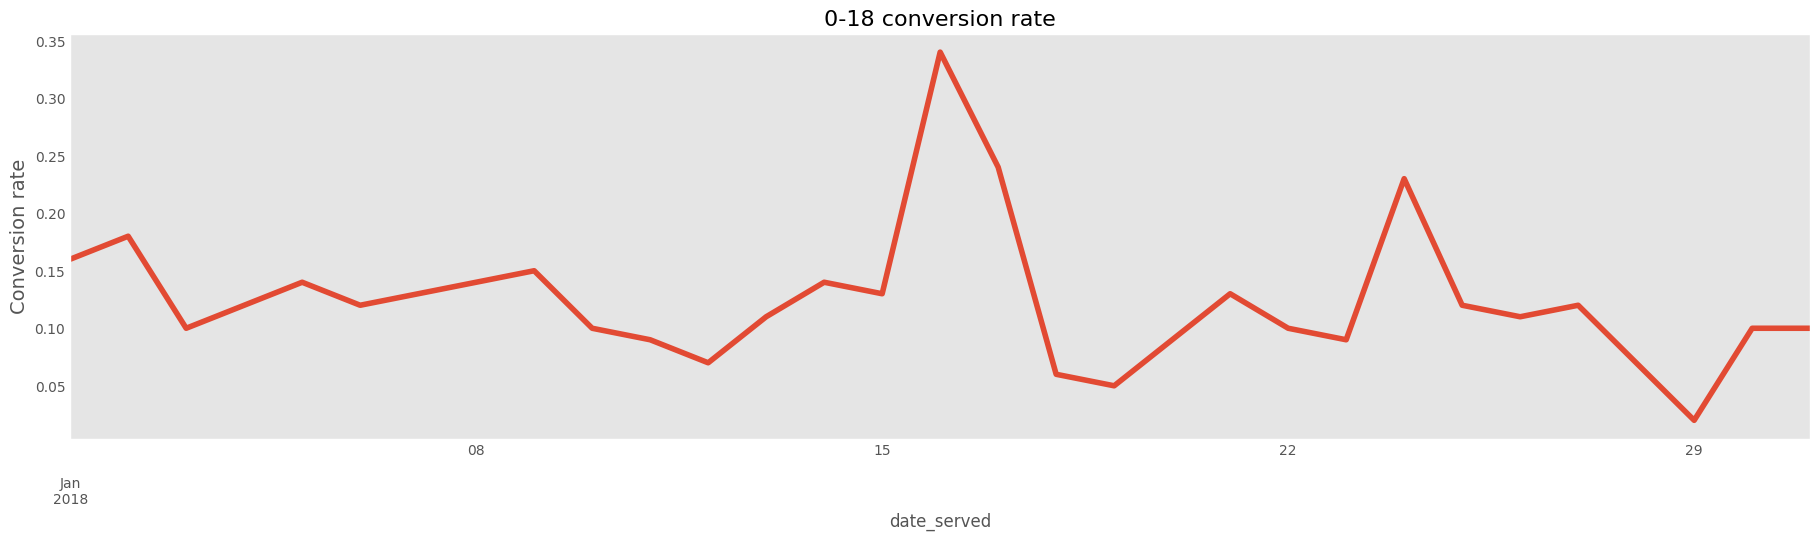

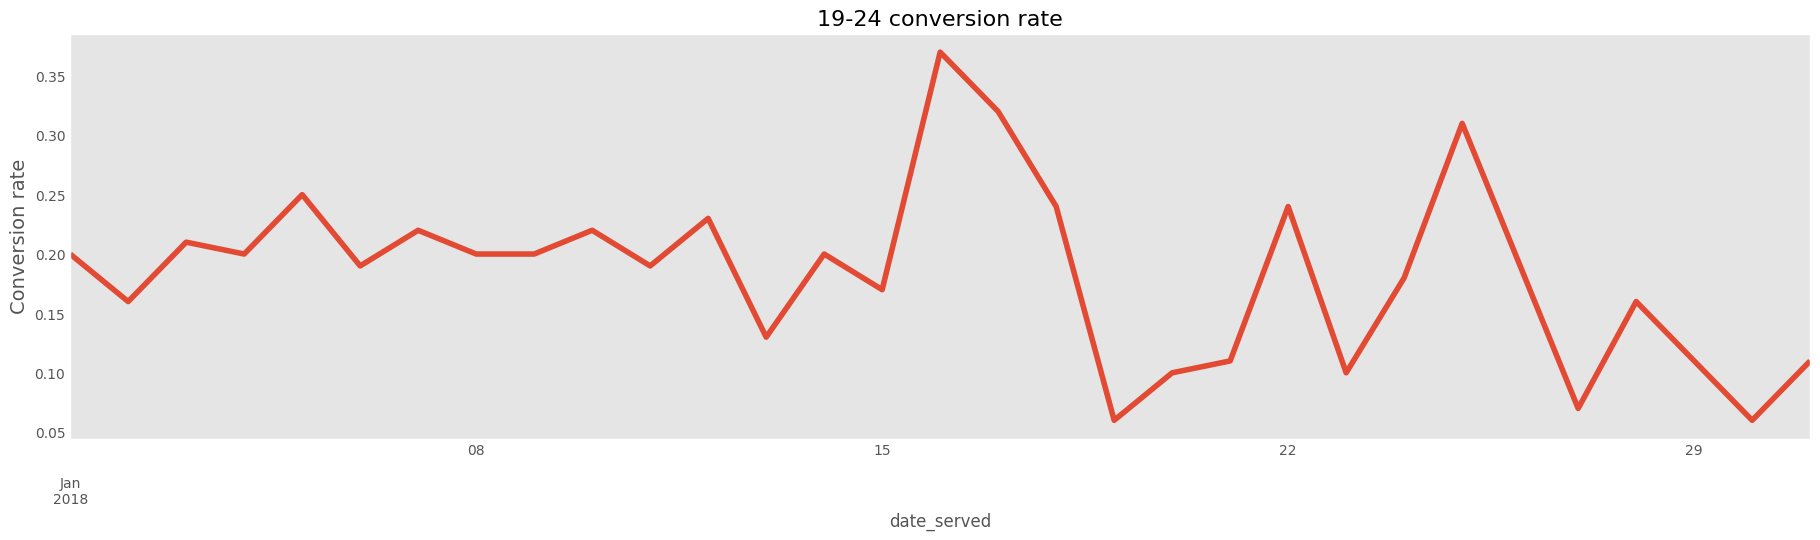

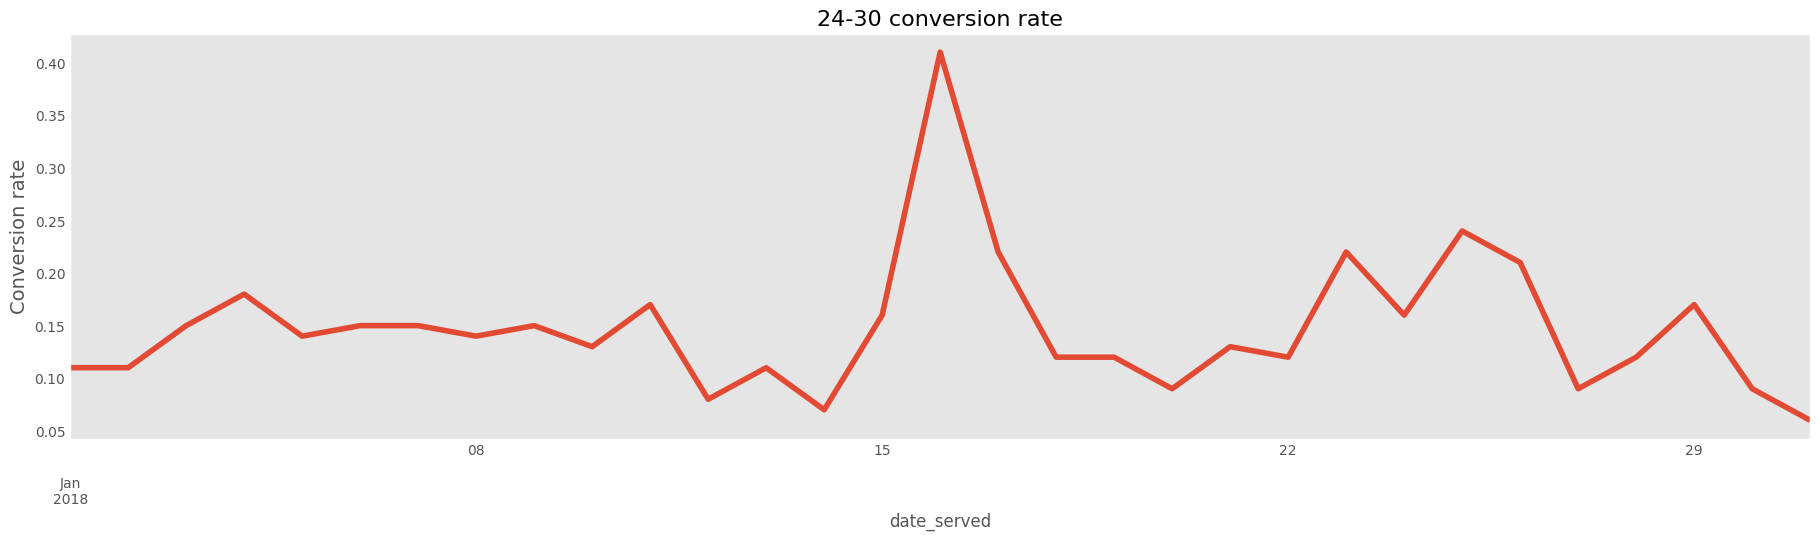

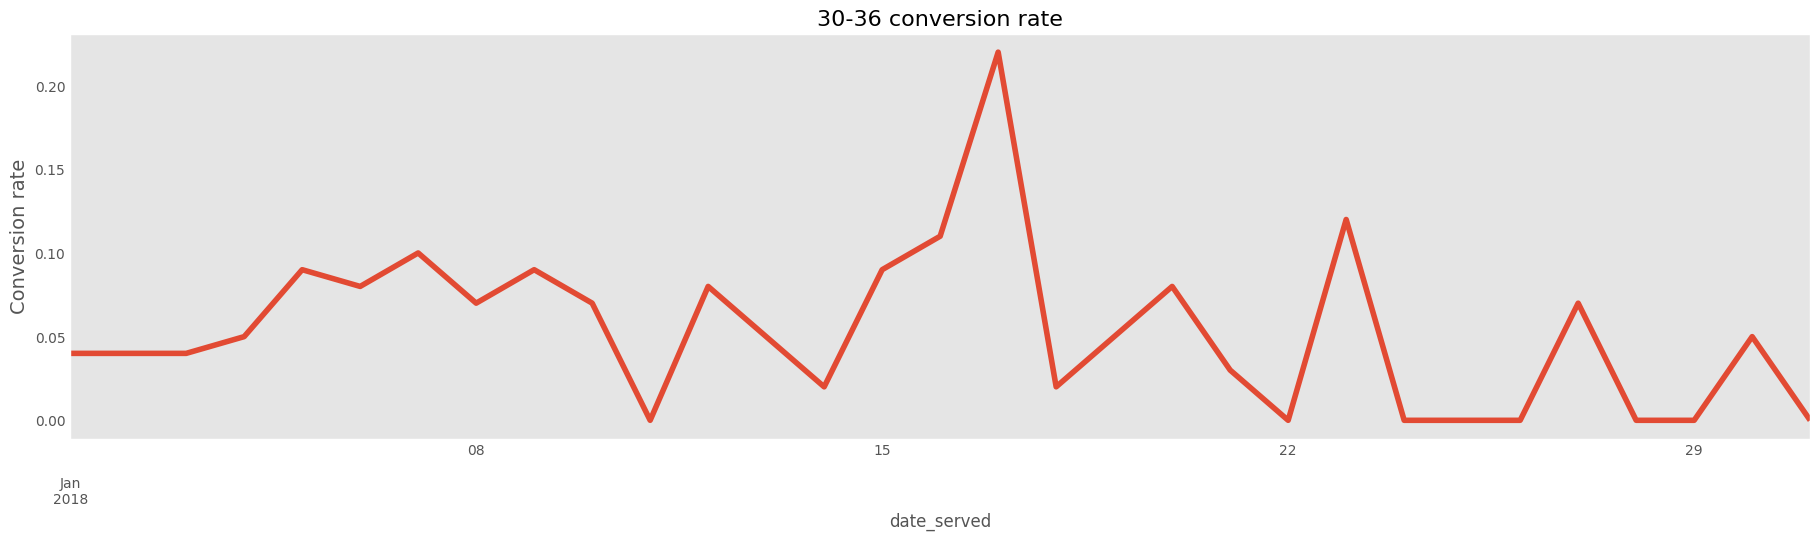

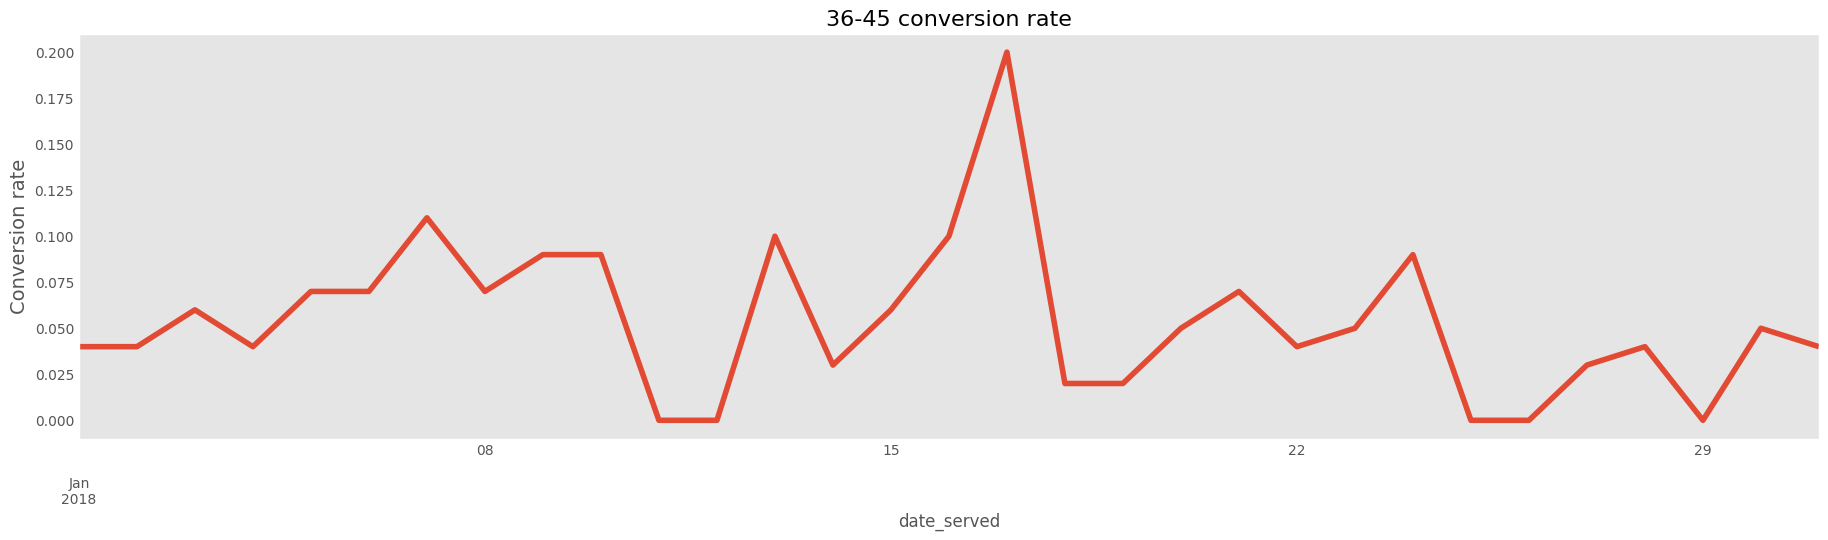

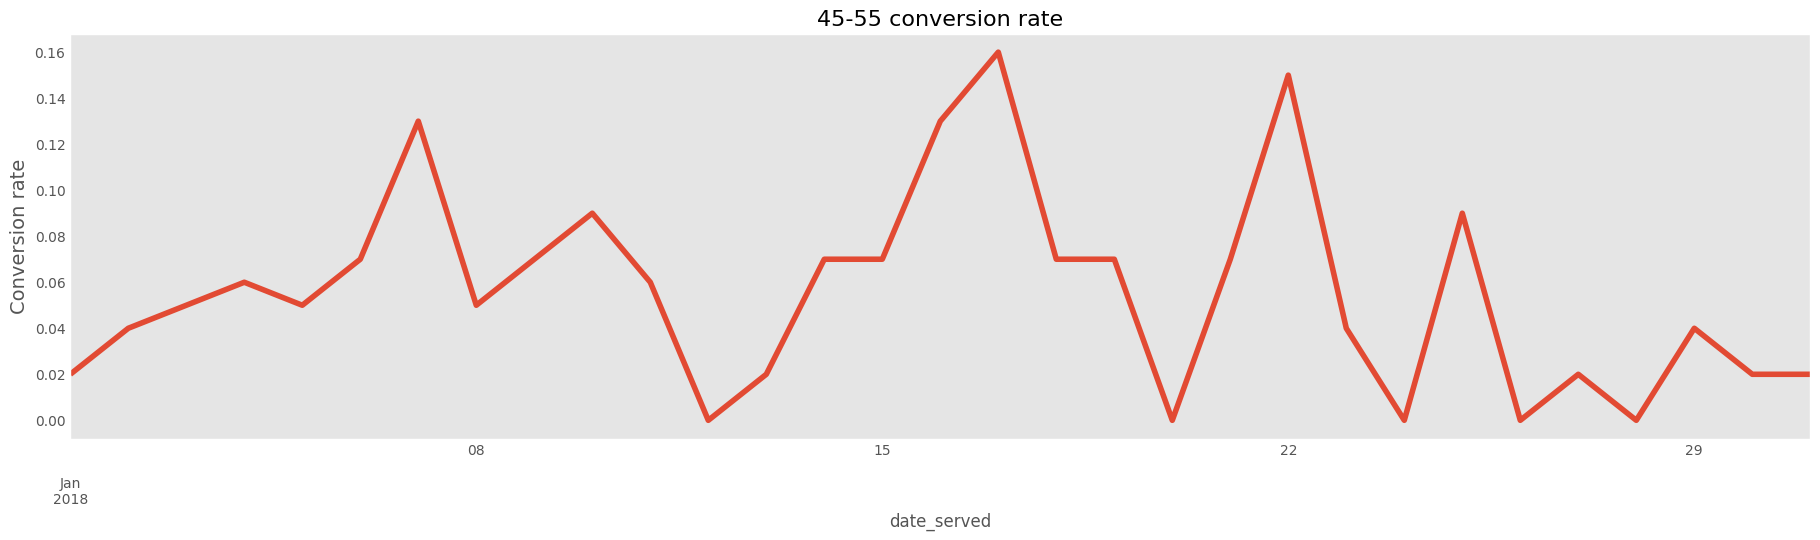

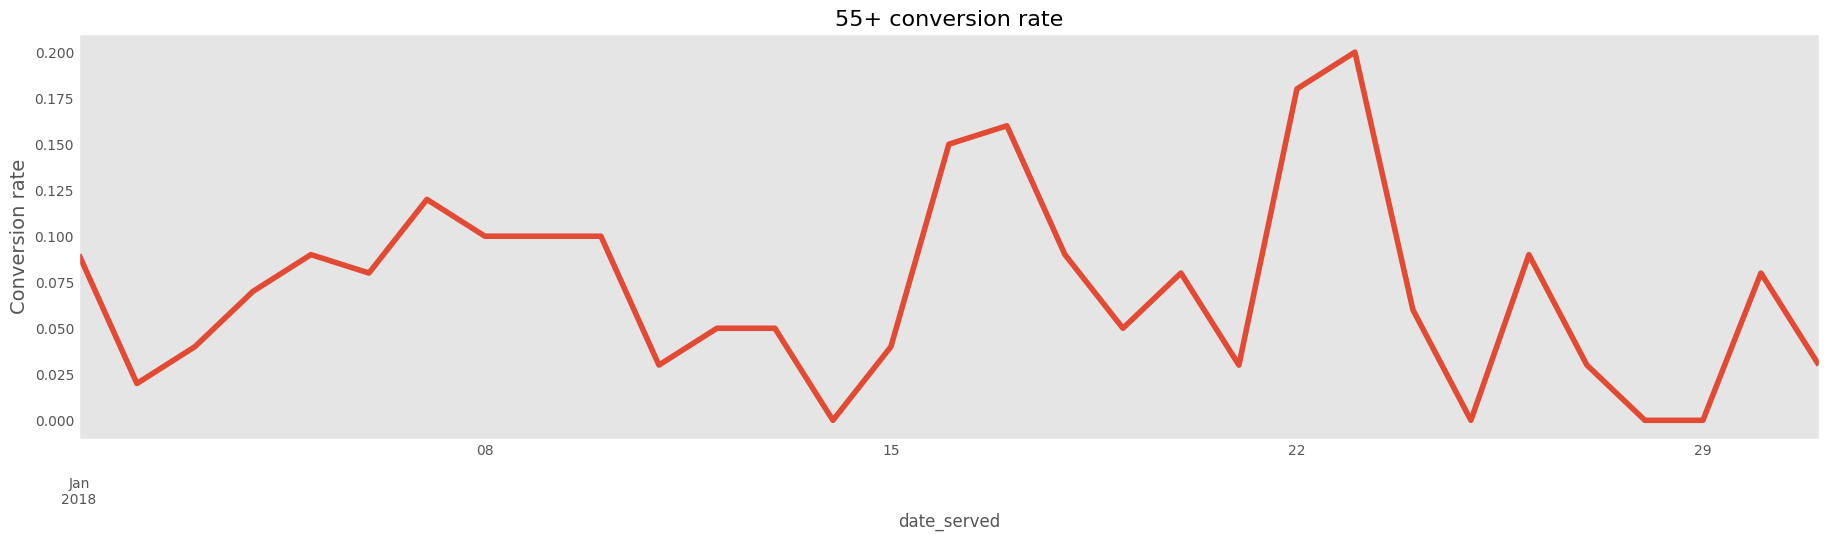

<Figure size 640x480 with 0 Axes>

In [ ]:
age_group_conv_df=pd.DataFrame(conversion_rate(df,['date_served','age_group']).unstack(level=1))
plotting_conv(age_group_conv_df,"line")

## Day of week

In [ ]:
df['DOW_served']=df['date_served'].dt.day_name()

In [ ]:
DOW_conversion_df = pd.DataFrame(conversion_rate(df,['DOW_served','marketing_channel']).unstack(level=1),index=df['DOW_served'].unique())

DOW_conversion_df.dropna(axis=0, inplace= True)

DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
Monday,0.16,0.12,0.06,0.12,0.06
Tuesday,0.91,0.15,0.07,0.15,0.12
Wednesday,0.84,0.13,0.08,0.15,0.11
Thursday,0.73,0.13,0.06,0.14,0.07
Friday,0.67,0.11,0.06,0.13,0.06
Saturday,0.82,0.11,0.06,0.09,0.07
Sunday,0.75,0.12,0.07,0.13,0.07


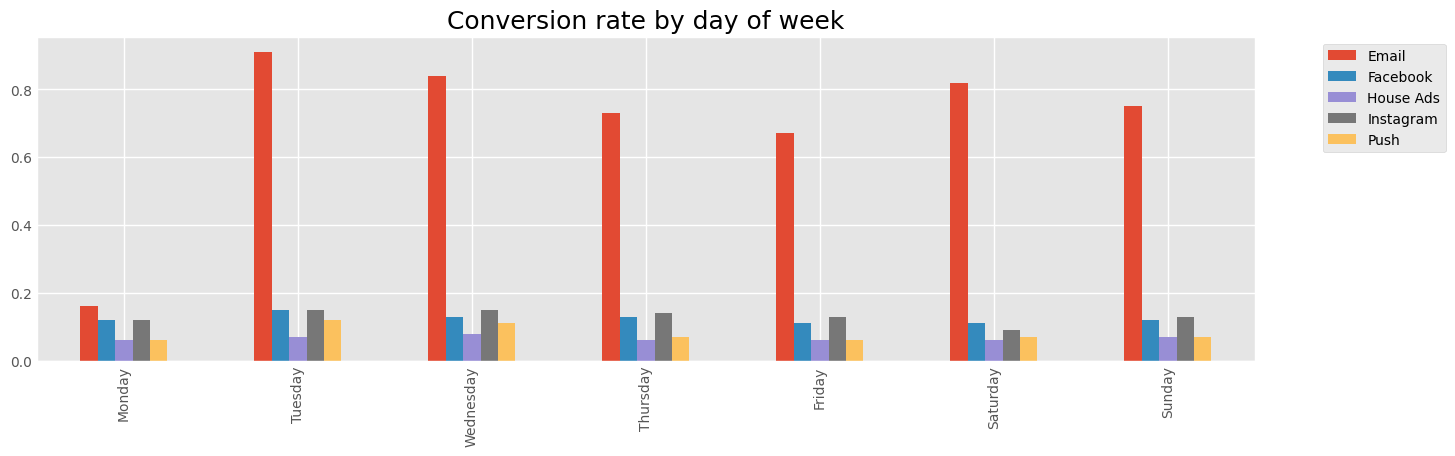

In [ ]:
DOW_conversion_df.plot(kind="bar",figsize=(14,4))
plt.title('Conversion rate by day of week',fontsize=18)
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

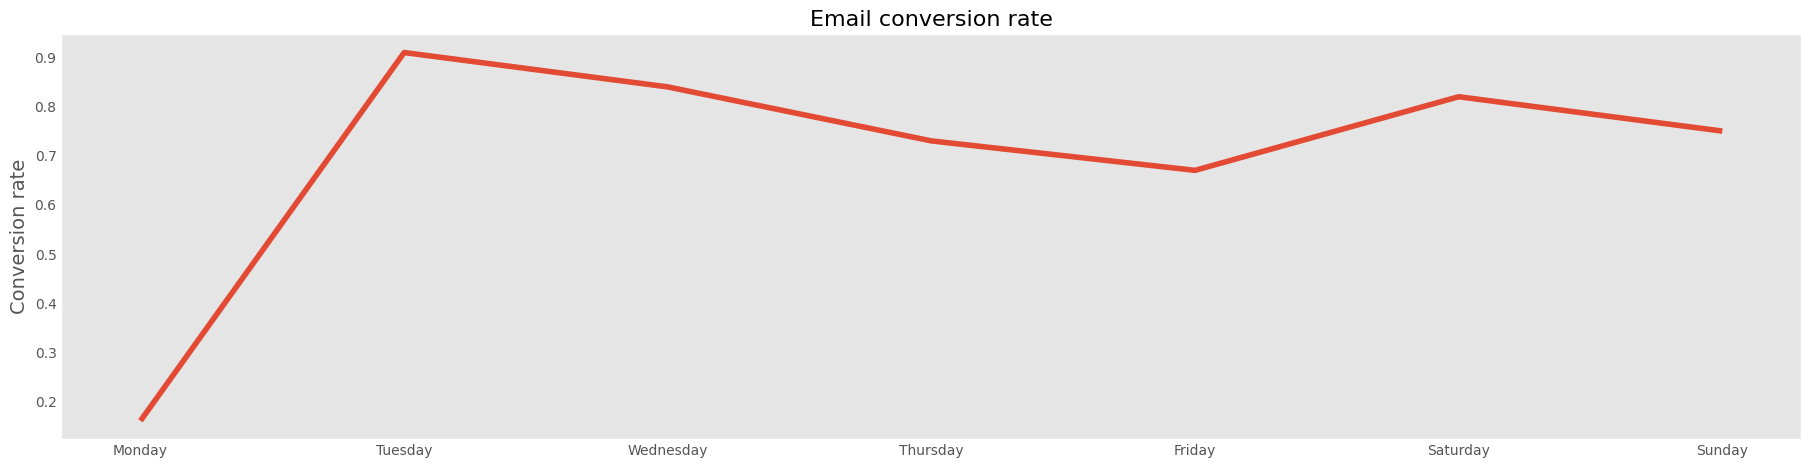

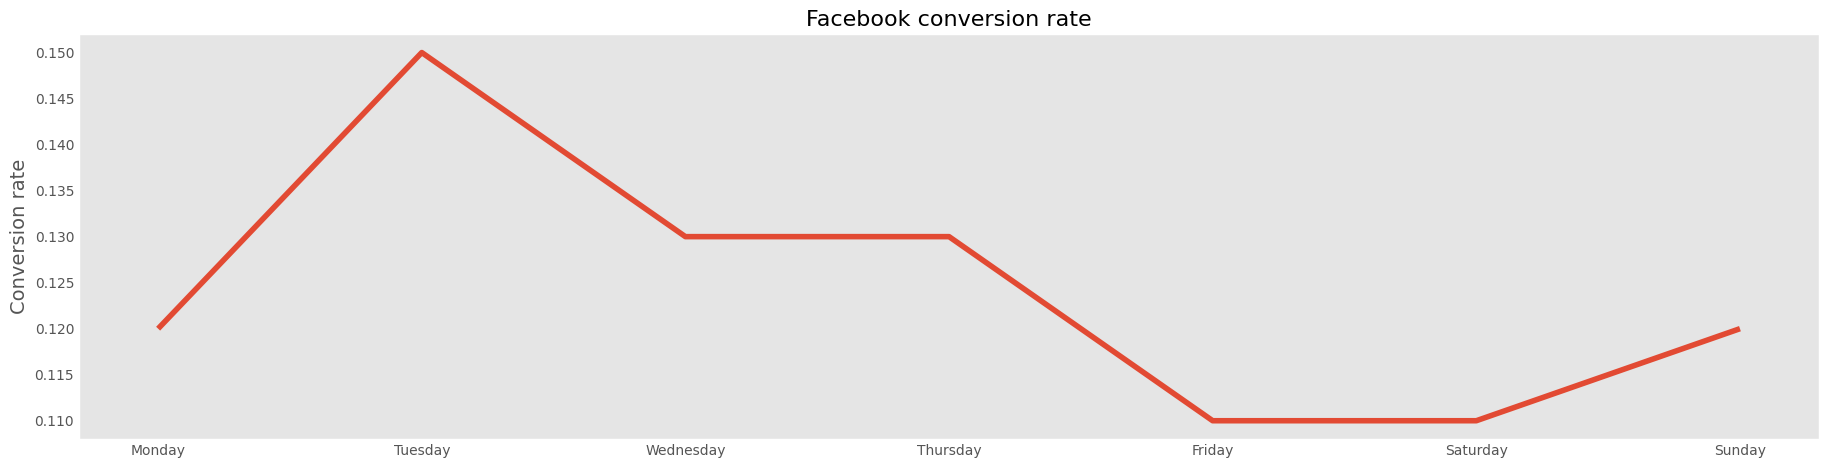

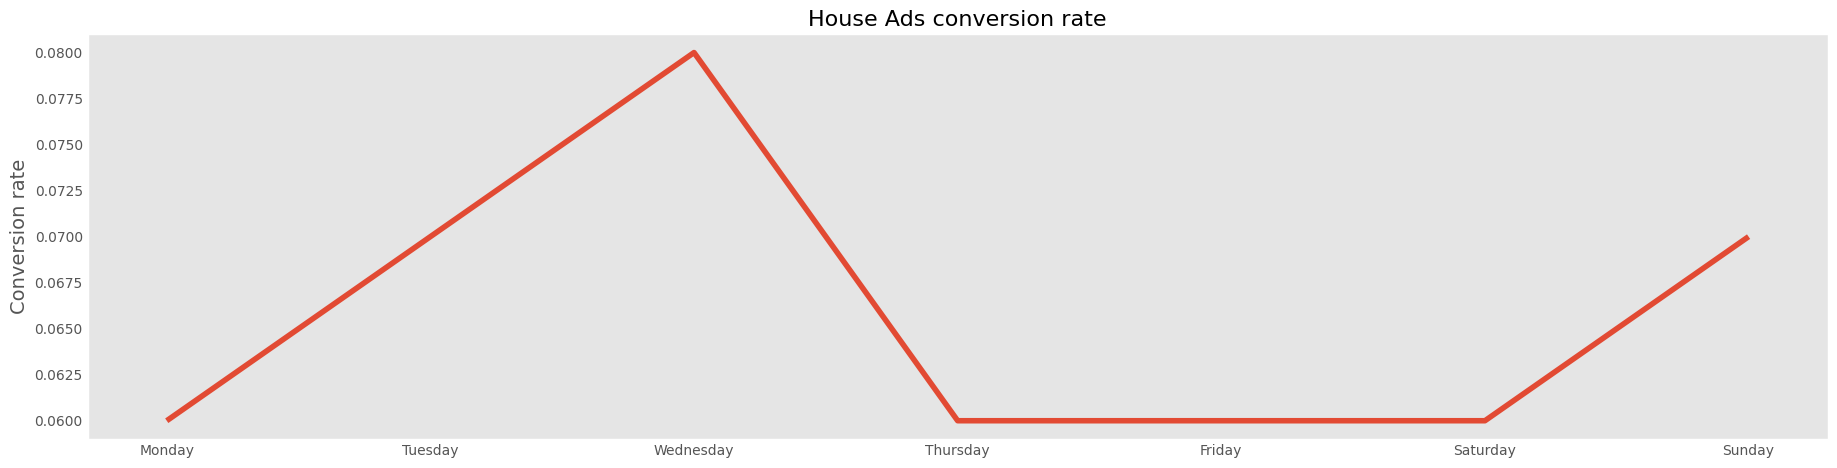

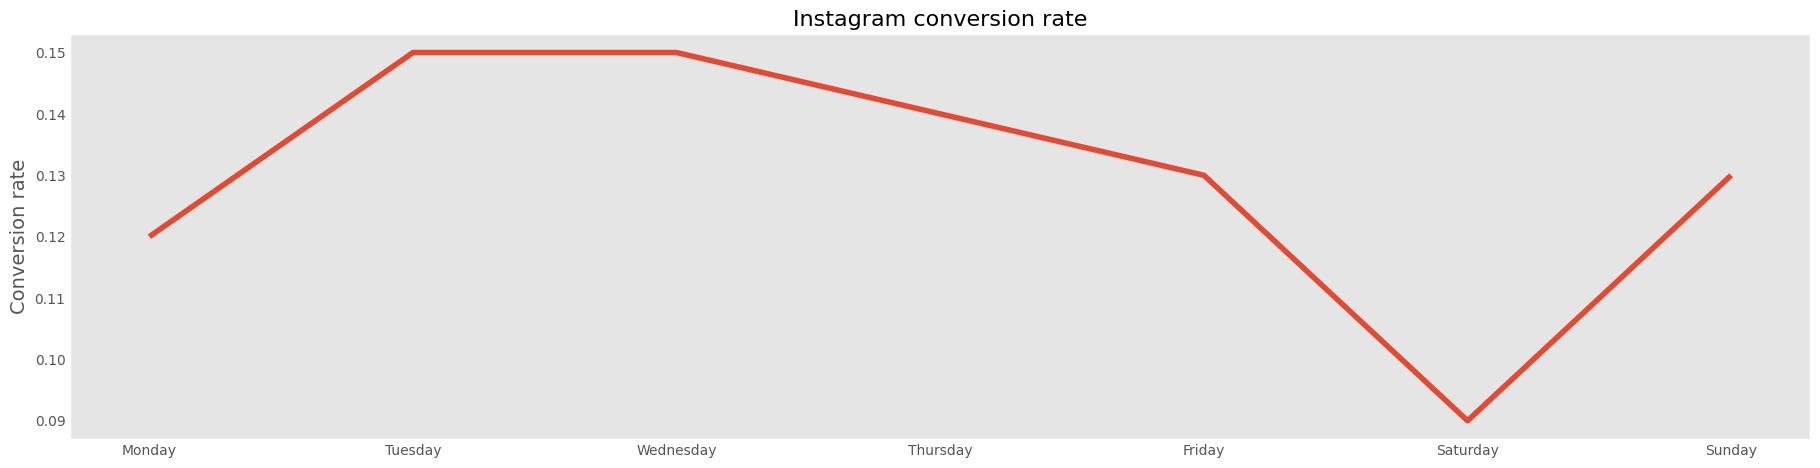

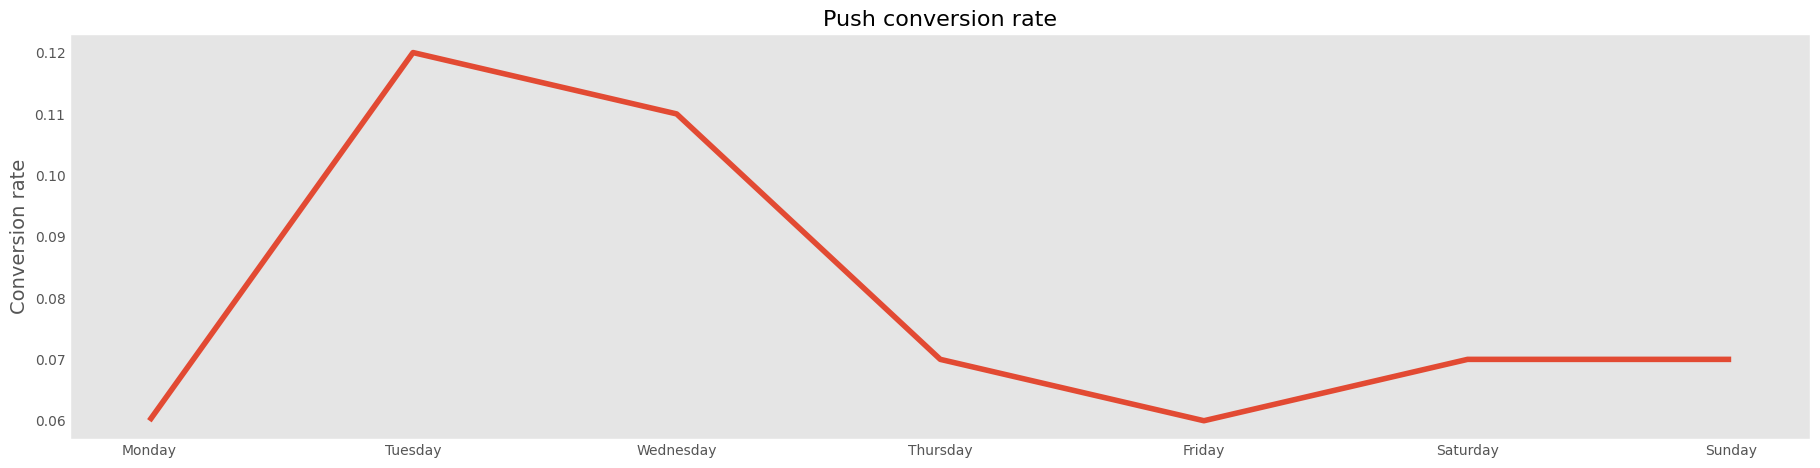

<Figure size 640x480 with 0 Axes>

In [ ]:
plotting_conv(DOW_conversion_df,"line");

### House ads conversion rate
--- The house ads team has become worried about some irregularities they've noticed in conversion rate. It is common for stakeholders to come to you with concerns they've noticed around changing metrics. As a data scientist, it's your job to determine whether these changes are natural fluctuations or if they require further investigation.



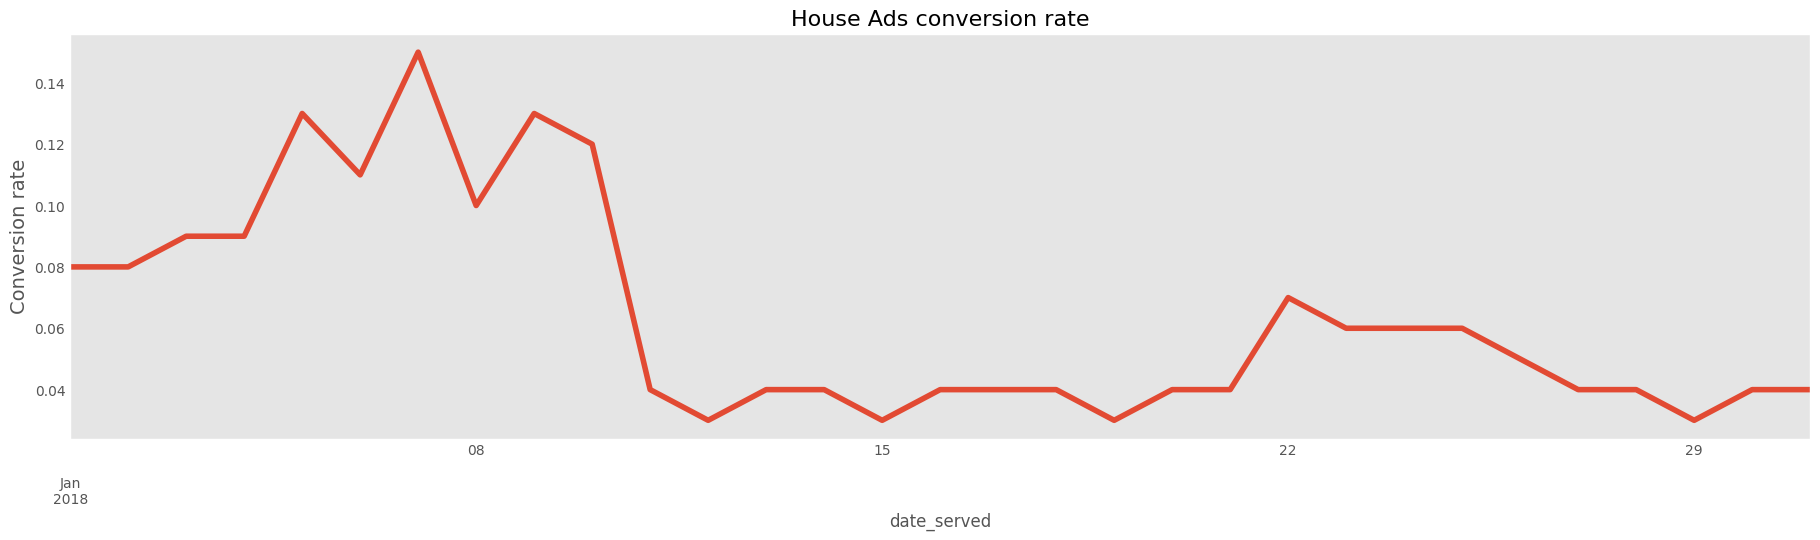

<Figure size 640x480 with 0 Axes>

In [ ]:
plotting_conv(pd.DataFrame(channel_convr_df['House Ads']),"line")

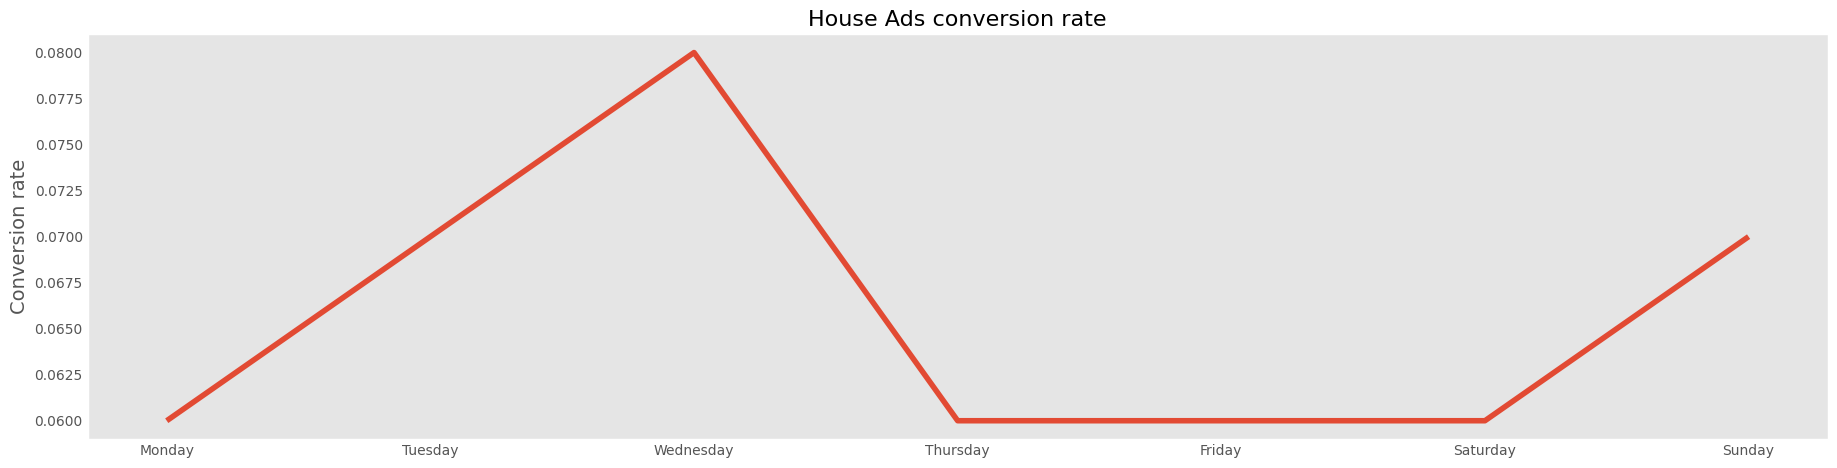

<Figure size 640x480 with 0 Axes>

In [ ]:
plotting_conv(pd.DataFrame(DOW_conversion_df['House Ads']),"line")

### Analysing House ads conversion rate


---
House ads conversion has been down since January 11, you will try to identify potential causes for the decrease.

It's vital to identify if the fluctuations are due to shifts in user behavior (i.e., differences across the day of the week or time of the month) versus a some problem in technical implementation or marketing strategy.


In [ ]:
convrsion_df

ads_served conversions conversion_rate
variant         marketing_channel                                        
control         Email                     274          80        0.291971
                Facebook                  894          52        0.058166
                House Ads                2552         172        0.067398
                Instagram                 888          52        0.058559
                Push                      468          15        0.032051
personalization Email                     291         113        0.388316
                Facebook                  966         185        0.191511
                House Ads                2181         126        0.057772
                Instagram                 983         213        0.216684
                Push                      525          68        0.129524

In [ ]:
idx = pd.IndexSlice
convrsion_df.loc[idx[:,'House Ads'],:]

,,ads_served,conversions,conversion_rate
variant,marketing_channel,,,
control,House Ads,2552,172,0.067398
personalization,House Ads,2181,126,0.057772


Both control & exp group have approx same low conversions rate



### Weekday vs Weekend House Ads Conversion

In [ ]:
house_ads_df = pd.DataFrame(channel_convr_df["House Ads"])
house_ads_df.reset_index(inplace=True)
house_ads_df['DOW']=house_ads_df['date_served'].dt.day_of_week
house_ads_df.head()

,date_served,House Ads,DOW
0,2018-01-01,0.08,0
1,2018-01-02,0.08,1
2,2018-01-03,0.09,2
3,2018-01-04,0.09,3
4,2018-01-05,0.13,4


In [ ]:
house_ads_df['day type'] = house_ads_df['DOW'].apply(lambda x: "Weekday" if x<=4 else "Weekend")
house_ads_df.head()

,date_served,House Ads,DOW,day type
0,2018-01-01,0.08,0,Weekday
1,2018-01-02,0.08,1,Weekday
2,2018-01-03,0.09,2,Weekday
3,2018-01-04,0.09,3,Weekday
4,2018-01-05,0.13,4,Weekday


In [ ]:
house_ads_df['DOW']=house_ads_df['date_served'].dt.day_name()
house_ads_df.head()

,date_served,House Ads,DOW,day type
0,2018-01-01,0.08,Monday,Weekday
1,2018-01-02,0.08,Tuesday,Weekday
2,2018-01-03,0.09,Wednesday,Weekday
3,2018-01-04,0.09,Thursday,Weekday
4,2018-01-05,0.13,Friday,Weekday


In [ ]:
print("Conversion rates for House Ads")
print(house_ads_df.groupby("day type")["House Ads"].mean())

Conversion rates for House Ads
day type
Weekday    0.064348
Weekend    0.062500
Name: House Ads, dtype: float64


No real difference in weekday vs weekend house ads conv rates



### House ads conversion by language
Now that its clear that there are no natural fluctuations across the day of the week lets check if language was correctly shown as per the target user preferences.

Perhaps the new marketing campaign does not apply broadly across different cultures

In [ ]:
house_ads_df=df[df['marketing_channel']=='House Ads']
print("Total house ads: {}".format(len(house_ads_df)))
print("House ads with wrong language: {}".format(sum(house_ads_df['language_displayed'] != house_ads_df['language_preferred'])))
print("House ads with correct language: {}".format(sum(house_ads_df['language_displayed'] == house_ads_df['language_preferred'])))
print("House ads conversions: {}".format(house_ads_df['converted'].sum()))

Total house ads: 4733
House ads with wrong language: 453
House ads with correct language: 4280
House ads conversions: 298


In [ ]:
house_ads_df['is_language_correct'] = house_ads_df.apply(lambda x: "Yes" if x['language_displayed']==x['language_preferred'] else "No", axis=1)
house_ads_df.head()

/tmp/ipython-input-53-1971611253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads_df['is_language_correct'] = house_ads_df.apply(lambda x: "Yes" if x['language_displayed']==x['language_preferred'] else "No", axis=1)


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,day_of_week_subscribed,DOW_served,is_language_correct
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18,2018-01-01,NaT,House Ads,True,Monday,Monday,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24,2018-01-01,NaT,House Ads,True,Monday,Monday,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30,2018-01-01,NaT,House Ads,True,Monday,Monday,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36,2018-01-01,NaT,House Ads,True,Monday,Monday,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45,2018-01-01,NaT,House Ads,True,Monday,Monday,Yes


In [ ]:
house_ads_lang_df=house_ads_df.groupby(['date_served','is_language_correct'])['user_id'].count().unstack(level=1)
house_ads_lang_df.fillna(0,inplace=True)
house_ads_lang_df['Correct %'] = 100*house_ads_lang_df['Yes']/(house_ads_lang_df['No'] + house_ads_lang_df['Yes'])
house_ads_lang_df.round()

is_language_correct,No,Yes,Correct %
date_served,,,
2018-01-01,2.0,189.0,99.0
2018-01-02,3.0,247.0,99.0
2018-01-03,0.0,220.0,100.0
2018-01-04,0.0,168.0,100.0
2018-01-05,0.0,160.0,100.0
2018-01-06,1.0,151.0,99.0
2018-01-07,2.0,130.0,98.0
2018-01-08,0.0,154.0,100.0
2018-01-09,0.0,157.0,100.0


Setting up conversion indexes

its clear that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

In this exercise, you will index non-English language conversion rates against English conversion rates in the time period before the language bug arose.

Bug occured on 11th, so conv rate from 1st to 10th should be considered

In [ ]:
house_ads_no_bug = house_ads_df[house_ads_df['date_served']<"2018-01-11"]
conv_rates = conversion_rate(house_ads_no_bug,['language_preferred'])
conv_rates_df = pd.DataFrame(conv_rates)
conv_rates_df.reset_index(inplace=True)
conv_rates_df.columns=['Language','Conversion_rate']
conv_rates_df


house_ads_no_bug.groupby('language_preferred')['converted'].sum()

,converted
language_preferred,
Arabic,7
English,142
German,12
Spanish,17


In [ ]:
house_ads_no_bug.groupby('language_preferred')['converted'].count()

,converted
language_preferred,
Arabic,14
English,1592
German,31
Spanish,117


In [ ]:
#finding if languae was correct what would have been conv rate
house_ads_lang_counts=pd.DataFrame(house_ads_df.groupby('language_preferred')['user_id'].count())
house_ads_lang_counts.reset_index(inplace=True)
house_ads_lang_counts.columns=['Language','Ad_Count']
house_ads_lang_counts

,Language,Ad_Count
0,Arabic,107
1,English,4112
2,German,112
3,Spanish,402


In [ ]:
house_ads_lang_counts['Expected_Conversion_Count']=house_ads_lang_counts['Ad_Count']*conv_rates_df['Conversion_rate']
house_ads_lang_counts

,Language,Ad_Count,Expected_Conversion_Count
0,Arabic,107,53.50
1,English,4112,411.20
2,German,112,49.28
3,Spanish,402,64.32


In [ ]:
print("Without bug house ads would have converted: {}".format(house_ads_lang_counts['Expected_Conversion_Count'].sum().round()))


Without bug house ads would have converted: 578.0


In [ ]:
len(house_ads_no_bug.loc[(house_ads_no_bug['language_preferred']=='English') & house_ads_no_bug['converted']==1])


142

# A/B Testing

Test allocation

The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

Before you begin analyzing the results, you will check to ensure users were allocated equally to the test and control groups

In [ ]:
email_df = df[df['marketing_channel']== "Email"]

In [ ]:
email_df['variant'].value_counts()

,count
variant,
personalization,291
control,274


In [ ]:
subscribers = email_df.groupby(['user_id',
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1))

# Drop missing values from the control column
control = subscribers_df['control'].dropna().astype(float)


# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna().astype(float)


In [ ]:
subscribers_df

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True
...,...,...
a100007288,True,NaN
a100007289,True,NaN
a100007290,True,NaN


In [ ]:
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


Creating a lift function

Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:

Treatment conversion rate - Control conversion rate

The result is the percent difference between the control and treatment.

In this exercise, you will create a function to automate the process of calculating lift. Many marketing teams run tests constantly. The more that you can automate the parts of the process that occur within every test, the more time you will have to do more interesting analyses.

Calculate the mean of a and b using np.mean().

Use a_mean and b_mean to calculate the lift of the treatment.

Print the results of the lift() function you created using the control and personalization variables.

In [ ]:
lift = (np.mean(personalization) - np.mean(control))/np.mean(control)
print("Lift is {}%".format(round(lift*100)))

Lift is 39%


In [ ]:
from scipy import stats

In [ ]:
##A two sample T-test is used to compare the means of two separate samples.

stats.ttest_ind(control,personalization)

TtestResult(statistic=np.float64(-2.734329944750507), pvalue=np.float64(0.0064514878446941815), df=np.float64(552.0))

In [ ]:
def ab_segmentation(channel,subsegment=None):

    if subsegment is None:

        subsegmented_df=df[df['marketing_channel']==channel]

        subscribers = subsegmented_df.groupby(['user_id','variant'])['converted'].max()

        subscribers_df=pd.DataFrame(subscribers.unstack(level=1))

        control= subscribers_df['control'].dropna().astype(float) # Explicitly convert to float

        personalization= subscribers_df['personalization'].dropna().astype(float) # Explicitly convert to float

        # Check if control or personalization are empty before performing t-test
        if len(control) > 1 and len(personalization) > 1:
            lift= (np.mean(personalization)-np.mean(control))/np.mean(control)

            print("lift: {}%".format(round(lift*100)))

            print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')
        else:
            print("Insufficient data in control or personalization groups for t-test.")


    else:

        for value in np.unique(df[subsegment].values):

            print(value)

            subsegmented_df=df[ (df['marketing_channel']==channel) & (df[subsegment]==value) ]

            subscribers = subsegmented_df.groupby(['user_id','variant'])['converted'].max()

            subscribers_df = pd.DataFrame(subscribers.unstack(level=1))

            control= subscribers_df['control'].dropna().astype(float) # Explicitly convert to float

            personalization= subscribers_df['personalization'].dropna().astype(float) # Explicitly convert to float

            # Check if control or personalization are empty before performing t-test
            if len(control) > 1 and len(personalization) > 1:
                lift= (np.mean(personalization)-np.mean(control))/np.mean(control)

                print("lift: {}%".format(round(lift*100)))

                print("Count of control & personlization: {} & {}".format(len(control),len(personalization)))

                print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')
            else:
                print(f"Insufficient data in control or personalization groups for t-test for segment: {value}")

In [ ]:
ab_segmentation("Email")

lift: 39%
t-statistic: TtestResult(statistic=np.float64(-2.734329944750507), pvalue=np.float64(0.0064514878446941815), df=np.float64(552.0)) 




In [ ]:
ab_segmentation("Email","language_displayed")

Arabic
lift: 50%
Count of control & personlization: 5 & 5
t-statistic: TtestResult(statistic=np.float64(-0.5773502691896255), pvalue=np.float64(0.5795840000000001), df=np.float64(8.0)) 


English
lift: 39%
Count of control & personlization: 240 & 248
t-statistic: TtestResult(statistic=np.float64(-2.2183598646203215), pvalue=np.float64(0.026991701290720503), df=np.float64(486.0)) 


German
lift: -2%
Count of control & personlization: 17 & 27
t-statistic: TtestResult(statistic=np.float64(0.19100834180787182), pvalue=np.float64(0.8494394170062678), df=np.float64(42.0)) 


Spanish
lift: 167%
Count of control & personlization: 8 & 4
t-statistic: TtestResult(statistic=np.float64(-2.3570226039551585), pvalue=np.float64(0.040156718110477524), df=np.float64(10.0)) 




/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
ab_segmentation("Instagram")

lift: 380%
t-statistic: TtestResult(statistic=np.float64(-10.74963558513612), pvalue=np.float64(3.659518839777878e-26), df=np.float64(1793.0)) 




In [ ]:
ab_segmentation("Instagram","age_group")

0-18
lift: 532%
Count of control & personlization: 125 & 168
t-statistic: TtestResult(statistic=np.float64(-4.420030279559059), pvalue=np.float64(1.3945853816242439e-05), df=np.float64(291.0)) 


19-24
lift: 1007%
Count of control & personlization: 115 & 187
t-statistic: TtestResult(statistic=np.float64(-8.919549191849601), pvalue=np.float64(4.71470086122104e-17), df=np.float64(300.0)) 


24-30
lift: 542%
Count of control & personlization: 125 & 146
t-statistic: TtestResult(statistic=np.float64(-5.770186139845332), pvalue=np.float64(2.174138604598001e-08), df=np.float64(269.0)) 


30-36
lift: 171%
Count of control & personlization: 145 & 107
t-statistic: TtestResult(statistic=np.float64(-1.7419217331973267), pvalue=np.float64(0.08275202630134186), df=np.float64(250.0)) 


36-45
lift: 145%
Count of control & personlization: 160 & 109
t-statistic: TtestResult(statistic=np.float64(-1.8514991272922312), pvalue=np.float64(0.06520183209266825), df=np.float64(267.0)) 


45-55
lift: 21%
Count 